## Imports

In [1]:
# Numpy para facilitação dos dados
import numpy as np

# Pandas para o Dataframe
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Pyplot para plotar gráficos
import matplotlib.pyplot as plt

# LOF para localização de outliers
from sklearn.neighbors import LocalOutlierFactor as LOF

# Importando o módulo do PCA
from sklearn.decomposition import PCA

## Funções

In [2]:
# Remove todos os dados não numericos do DataFrame
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

## Lendo o DataFrame e removendo dados não numericos

In [3]:
# Lendo o DataFrame
df = pd.read_csv('Final Data.csv', index_col='Unnamed: 0')

# Convertendo os tipos dos dados para melhor utilização
df = df.convert_dtypes()

# Removendo dados não numericos
df = remove_not_numbers(df)

# Mostrando o DataFrame
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


## Normalizando o DataFrame e separando as Features

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Definindo colunas que serão utilizadas como features
features = ["latitude", "wind_speed", "wind_degree", "pressure", "humidity", "cloudcover", "uv_index", "visibility"]

# Definindo o Normalizador
scaler = MinMaxScaler()

# Normalizando o DataFrame utilizando apenas as features
norm = scaler.fit_transform(df[features].values)

# Mostrando o DataFrame Normalizado
norm

array([[1.        , 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       [0.99549268, 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       [0.99092275, 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       ...,
       [0.00939026, 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ],
       [0.00438212, 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ],
       [0.        , 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ]])

## Criação de um DataFrame próprio dos dados normalizados

In [5]:
# Criando o DataFrame a partir de um numpy array
df_norm = pd.DataFrame(norm, columns=features)

# Concatenando a coluna temperature ao DataFrame normalizado
df_norm = pd.concat([df_norm, pd.Series(df['temperature']).reset_index(drop=True)], axis=1)

# Mostrando o DataFrame normalizado com todas as features e o price
df_norm.head(10)

,latitude,wind_speed,wind_degree,pressure,humidity,cloudcover,uv_index,visibility,temperature
0,1.000000,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
1,0.995493,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
2,0.990923,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
3,0.986415,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
4,0.981908,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
5,0.977401,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
6,0.972831,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
7,0.968324,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
8,0.963816,0.404255,0.165266,0.45,0.858696,0.93,0.0,1.0,4
9,0.959246,0.404255,0.165266,0.45,0.858696,0.93,0.0,1.0,4


## Realizando o PCA

In [6]:
# Definindo o X como as features
x = df_norm[features]
# Definindo o Y como a temperatura (target)
y = df_norm['temperature']

# Calculo do PCA com 3 componentes
pca = PCA(n_components=8)
# Ajuste do PCA
pca.fit(x)
# Realização da transformação PCA
x_pca = pca.transform(x)

## LOF

### Setando configurações

In [7]:
# Semente aleatória para repetibilidade
random_seed = 97404

# Fração de outliers para o modelo encontrar
frac_outlier = 0.1

### Plotando o resultado do LOF

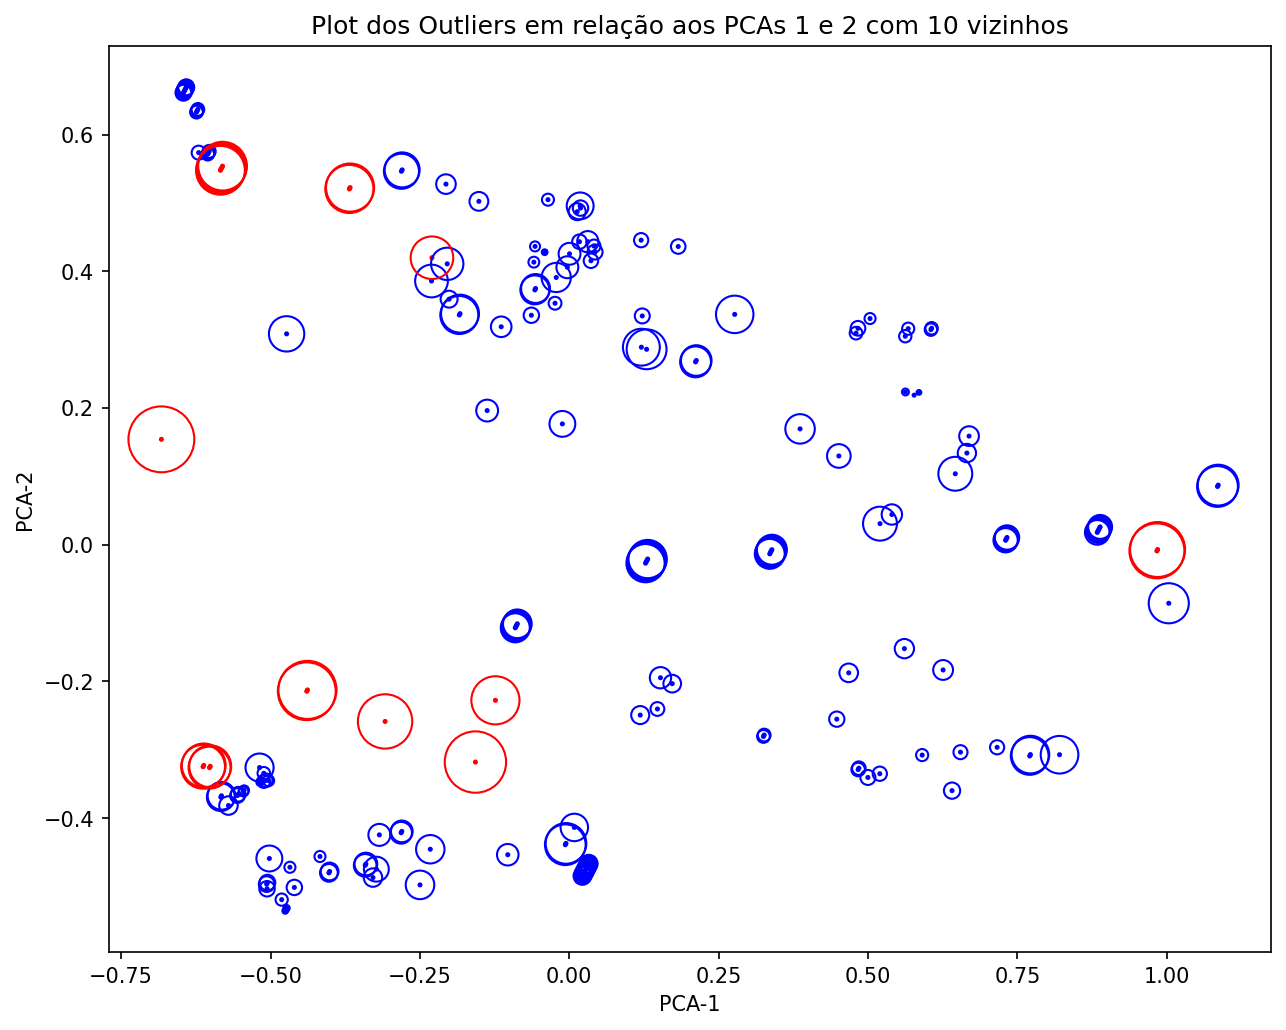

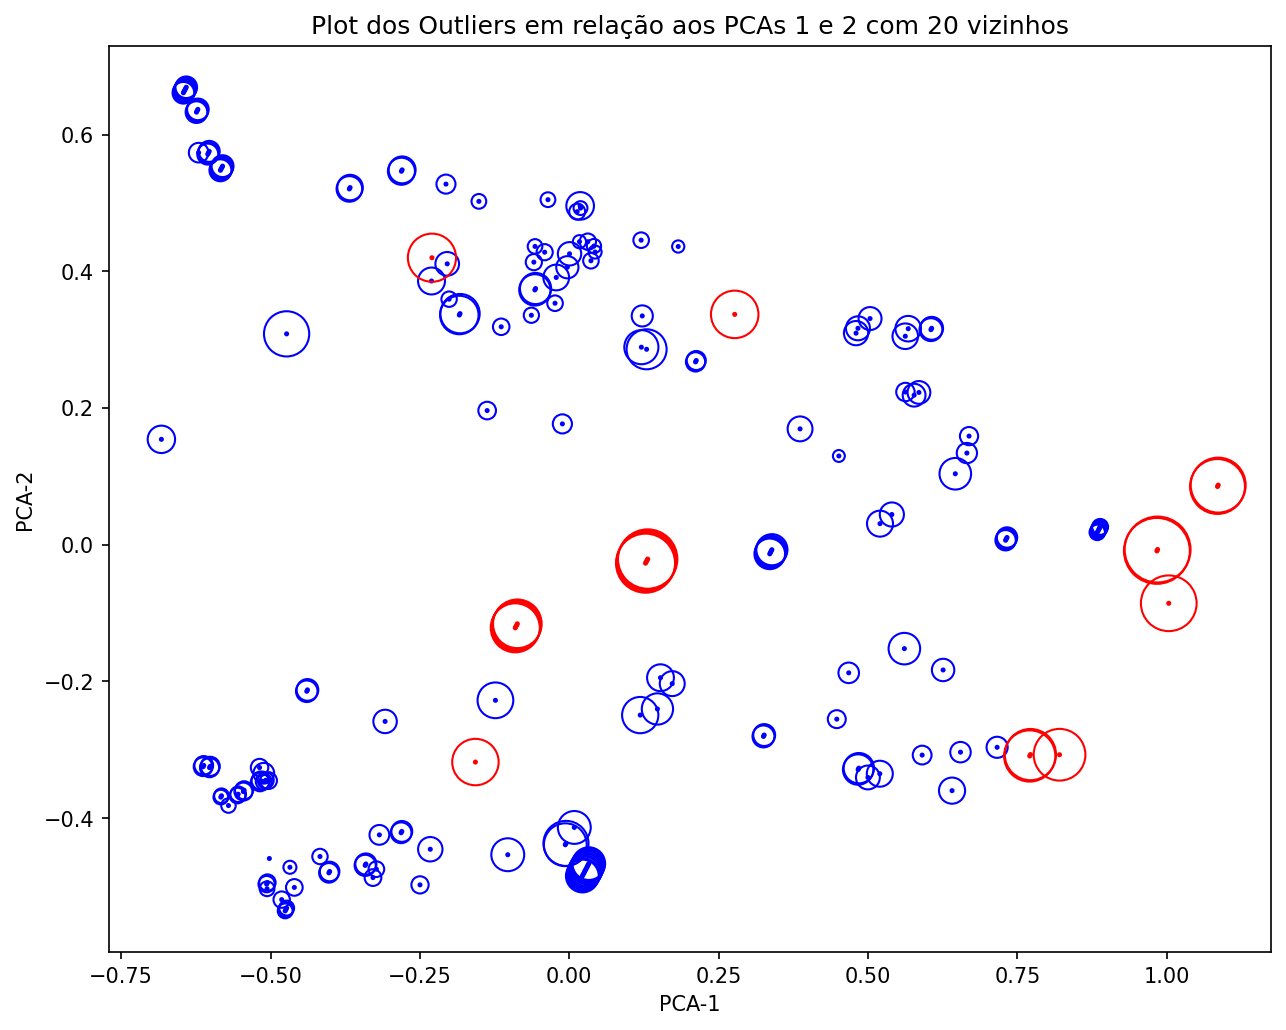

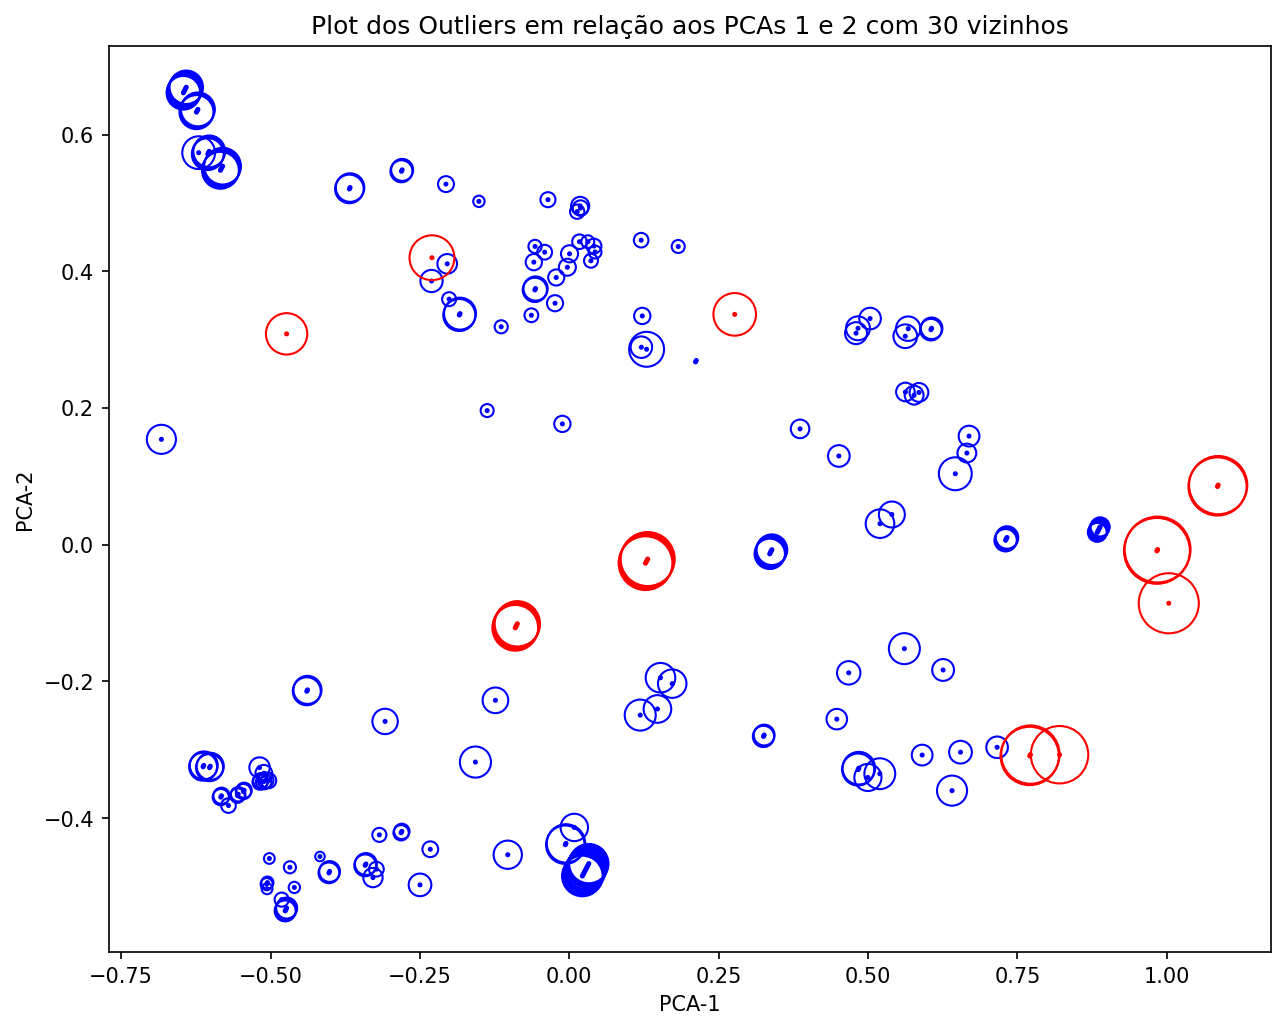

In [8]:
# Setando as cores dos outliers e inliers
CORES = np.array(["red", "blue"])

for n in [10, 20, 30]:
    # Pegando a figura do pyplot
    fig, ax = plt.subplots(figsize=(10,8), dpi=150)
    
    # Criando o modelo
    modelo_lof = LOF(n_neighbors=n, contamination=frac_outlier)
    
    # Fitando o modelo e fazendo a previsão
    modelo_lof.fit(x_pca)
    prev = modelo_lof.fit_predict(x_pca)

    # Plotando os dados
    ax.scatter(
        x_pca[:, 0],
        x_pca[:, 1],
        marker=".",
        s=8,
        color=CORES[(prev + 1) // 2],
    )
    
    # plota os círculos!
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    ax.scatter(
        x_pca[:, 0],
        x_pca[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(prev + 1) // 2],
        facecolors="none",
    )

    # Setando o nome dos eixos e da figura
    ax.set_xlabel('PCA-1')
    ax.set_ylabel('PCA-2')
    ax.set_title(f'Plot dos Outliers em relação aos PCAs 1 e 2 com {n} vizinhos')
    
    # Salvando a figura
    fig.savefig(f'Plot dos Outliers em relação aos PCAs 1 e 2 com {n} vizinhos', bbox_inches='tight')
    
    # Plotando
    plt.show()

### Mostrando a quantidade de outliers

In [9]:
# Posições de inliers
logic = prev == 1

# Pegando apenas inliers
x_clean = x_pca[logic]

# Printando resultados
print(f'Dimensão do DataFrame Inicial: {x_pca.shape}')
print(f'Dimensão do DataFrame Sem Outliers: {x_clean.shape}')
print(f'Quantidade de Outliers Removidos: {x_pca.shape[0] - x_clean.shape[0]}')

Dimensão do DataFrame Inicial: (182, 8)
Dimensão do DataFrame Sem Outliers: (163, 8)
Quantidade de Outliers Removidos: 19


## Insolation Forest

In [10]:
seed = random_seed

In [11]:
from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # mude para True para ver a borda de previsão

# aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=frac_outlier,
    random_state=seed,
)

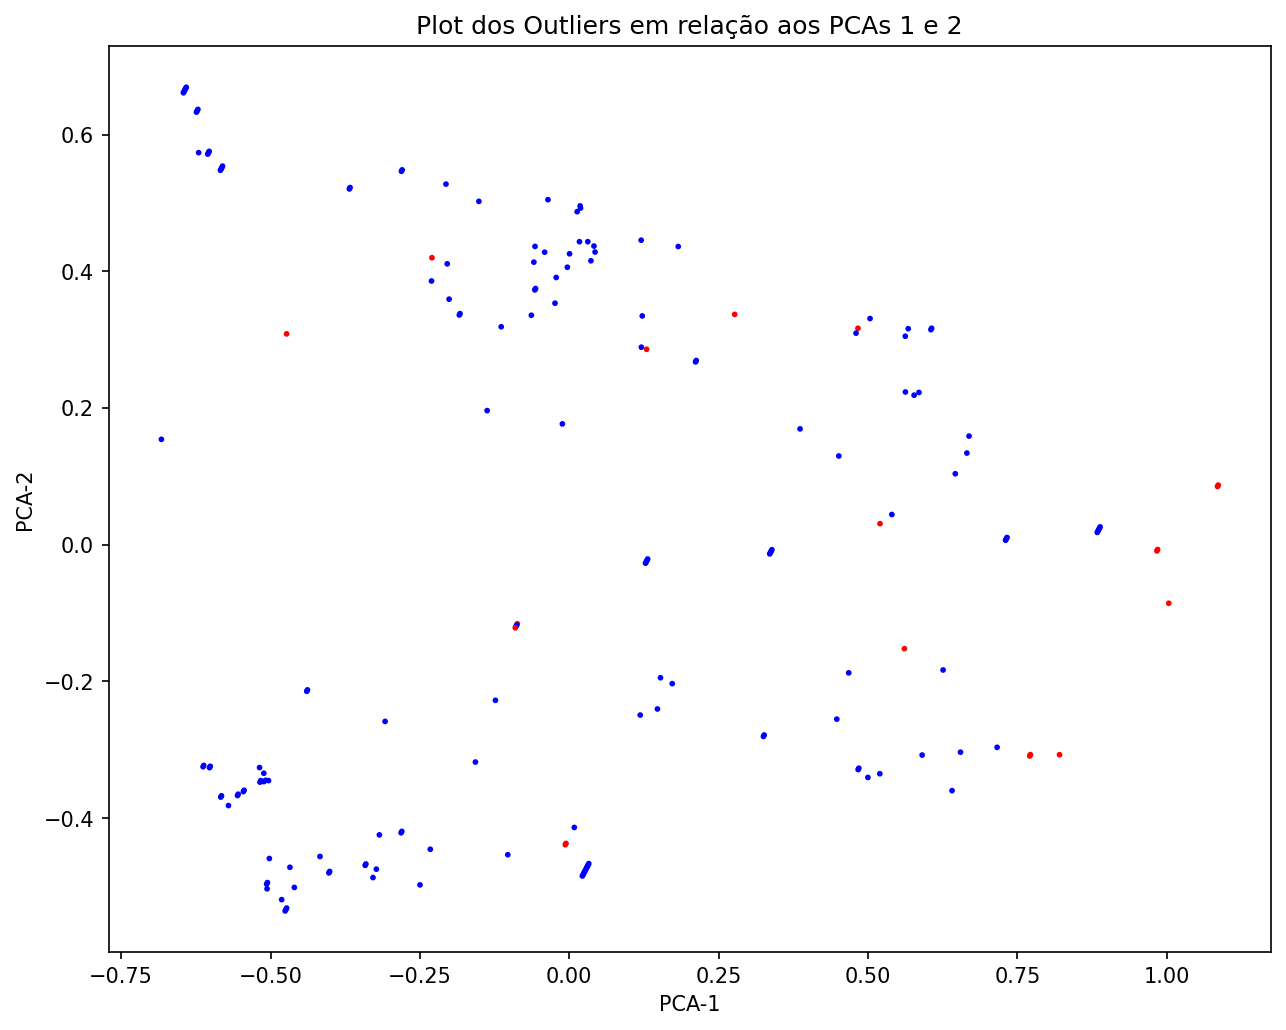

In [12]:
# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(x_pca)
previsao = modelo_if.predict(x_pca)

fig, eixo = plt.subplots(figsize=(10, 8), dpi=150)

eixo.scatter(
    x_pca[:, 0],
    x_pca[:, 1],
    marker='.',
    s=12,
    color=CORES[(previsao + 1) // 2],
)

# Setando o nome dos eixos e da figura
eixo.set_xlabel('PCA-1')
eixo.set_ylabel('PCA-2')
eixo.set_title(f'Plot dos Outliers em relação aos PCAs 1 e 2')

# plota a borda entre as regiões de outlier/inlier
if COM_BORDA_DE_PREVISAO:
    xx, yy = np.meshgrid(
        np.linspace(-0.5, 0.7, 150),
        np.linspace(-0.75, 1.2, 150),
    )
    Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

fig.savefig(f'Plot dos Outliers em relação aos PCAs 1 e 2_InsolationForest', bbox_inches='tight')
    
plt.show()